> 다음을 참고하였다.
>
> https://m.blog.naver.com/samsjang/220504966397
>
> [OpenCV 회전이동](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html)
>
> [Matplotlib으로 시각화](https://zzsza.github.io/data/2018/01/23/opencv-1/)
>
> [좌표축 회전](https://saegil.tistory.com/38)

In [3]:
import cv2 # conda install opencv
import numpy as np
from matplotlib import pyplot as plt 
import math

# Image 읽기

In [4]:
img = cv2.imread("test.png", cv2.IMREAD_COLOR)

`cv2.imread(fileName, flag)`
 - fileName : 이미지 파일의 경로
 - falg : 옵션
     1. `cv2.IMREAD_COLOR` : 이미지 파일을 color로 읽음. 투명한 부분은 무시. Default
     2. `cv2.IMREAD_GRAYSCALE` : 이미지 파일을 Grayscale로 읽음. 실제 이미지 처리시 중간 단계로 많이 사용
     3. `cv2.IMREAD_UNCHAGED` : 이미지 파일을 alpha channel까지 포함하여 읽음 
         + alpha channel : 이미지의 투명한 부분

In [5]:
img.shape # (이미지의 y축 크기, x축 크기, 채널의 수)

(512, 509, 3)

---

# Image 시각화

In [6]:
# cv2.imshow('image', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

*.py파일로 작업시 윈도우가 나오나 jupyter notebook 에서(특히 Mac에서) 무한 로딩이 걸리는 경우가 많음. 이를 해결하기 위해 다음 작업으로 대체할 수 있음

In [9]:
cv2.imshow('image', img)
cv2.waitKey(5000)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

## Matplotlib을 사용한 시각화

이 방법은 비율 축소시 좋지 않음.

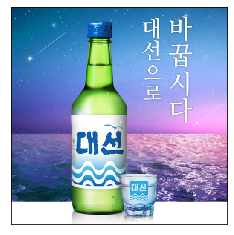

In [10]:
b, g, r = cv2.split(img)
newimage = cv2.merge([r,g,b])

plt.figure()
plt.imshow(newimage)
plt.xticks([]) # x축 삭제
plt.yticks([]) # y축 삭제
plt.show()

- `OpenCV`는 BGR을 사용하지만 `Matplotlib`은 RGB를 사용하여 출력
    + `cv2.split(img)`를 사용해 각 색상별 분리 
    + `cv2.merge([r,g,b])`를 이용하여 b, r, g를 변경

---

# Image Resize

In [11]:
img2 = cv2.resize(img, None, fx=0.5, fy=1, interpolation=cv2.INTER_AREA)
img3 = cv2.resize(img, None, fx=1, fy=0.5, interpolation=cv2.INTER_AREA)
img4 = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

`cv2.resize(img, None, fx=0.5, fy=1, interpolation=cv2.INTER_AREA)`
- img : 리사이즈를 위한 이미지 원본
- None : dsize를 나타내는 튜플 값(가로방향 픽셀수, 세로방향 픽셀수) ex) dsize=(640,480)
- fx : 원본 이미지 너비에서 입력한 비율로 변경
- fy : 원본 이미지 높이에서 입력한 비율로 변경
    + fx, fy를 설정할때 dsize=(0,0) or None 으로 설정
- interpolation : 이미지 크기 변경시, 변형된 이미지의 픽셀을 추정해서 값을 할당. 이를 자동으로 해주는 기능

|속성|의미|설명|
|:---:|:---:|:---:|
|cv2.INTER_NEAREST|이웃 보간법||
|cv2.INTER_LINEAR|쌍 선형 보간법|Default|
|cv2.INTER_LINEAR_EXACT|비트 쌍 선형 보간법||
|cv2.INTER_AREA|영역 보간법|픽셀 영역 관계를 이용한 resampling 방법으로 이미지 축소에서 선호|
|cv2.INTER_CUBIC|바이큐빅 보간법|$4\times4$ 픽셀에 적용되는 방법|
|cv2.INTER_LANCZOS4|Lanczos 보간법|$4\times4$ 픽셀에 적용되는 방법|

   
`cv2.INTER_LINEAR` 을 가장 널리 사용하며, 이미지 확대시 `cv2.INTER_CUBIC` 이나 `cv2.INTER_LINEAR`. 축소시 `cv2.INTER_AREA` 을 많이 사용. 


---

## Matplotlib 시각화에서의 문제

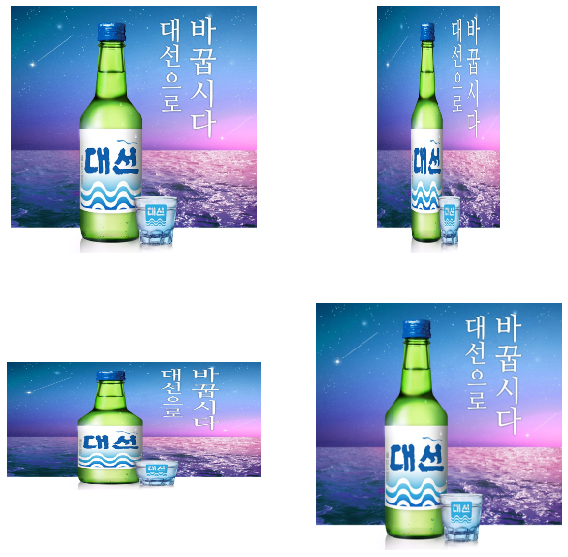

In [12]:
images = [img, img2, img3, img4]

fig = plt.figure(figsize=(10,10))

for i in range(len(images)):
    b, g, r = cv2.split(images[i])
    newimage = cv2.merge([r,g,b])
    
    fig.add_subplot(2,2,1+i)
    plt.imshow(newimage)
    plt.axis('off') # x,y축 삭제

plt.show()

---

# 이동
$$
\begin{pmatrix}
x + t_x\\
y + t_y\\
1
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 & t_x \\
0 & 1 & t_y \\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
x\\
y\\
1
\end{pmatrix}
$$

[[  1.   0. 100.]
 [  0.   1.  50.]]


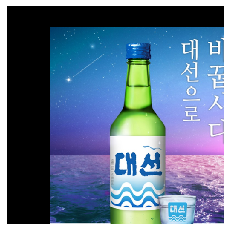

In [150]:
height, width, channel = img.shape

T = np.float32([[1, 0, 100], [0, 1, 50]]) # 데이터 처리의 범위에 따른 float32 or float64 사용
print(T)

T_img = cv2.warpAffine(img, T, (width, height))


b, g, r = cv2.split(T_img)
newimage = cv2.merge([r,g,b])

plt.figure()
plt.imshow(newimage)
plt.axis('off')
plt.show()

`cv2.warpAffine()` 함수는 이미지의 모든 픽셀을 행렬 T로 이동시킨다.
   
   - (width, height) : 출력될 이미지 사이즈. 높이와 너비의 순서에 주의

---

# 회전

1. 좌표의 회전 이동
$
\begin{pmatrix}
x'\\
y'
\end{pmatrix}
=
\begin{pmatrix}
cos\theta & -sin\theta \\
sin\theta & cos\theta
\end{pmatrix}
\begin{pmatrix}
x\\
y
\end{pmatrix}
$

2. 좌표축의 회전 이동
$
\begin{pmatrix}
x'\\
y'
\end{pmatrix}
=
\begin{pmatrix}
cos\theta & sin\theta \\
-sin\theta & cos\theta
\end{pmatrix}
\begin{pmatrix}
x\\
y
\end{pmatrix}
$

다음의 회전 변환은 원점이 아닌 특정 좌표를 기준으로 회전시키며, 크기변환까지 함께 수행한다.

$$
\begin{pmatrix}
x'\\
y'\\
1
\end{pmatrix}
=
\begin{pmatrix}
\alpha & \beta & (1-\alpha)\cdot Center_x - \beta\cdot Center_y \\
-\beta & \alpha & \beta\cdot Center_x +
(1-\alpha)\cdot Center_y\\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
x\\
y\\
1
\end{pmatrix}
$$

- $\alpha = scale \times cos\theta$
- $\beta = scale \times sin\theta$
- Center : 회전 중심 좌표
- theta : 회전각도, 양수는 반시계, 음수는 시계방향
- scale : 회전후 추가적으로 확대 또는 축소할 비율

In [13]:
v = (1.0, 1.0)

c = (1.0,2.0)




theta = math.pi/2
scale =1
a = scale * math.cos(theta)
b = scale * math.sin(theta)

R = np.float32([[a, b, (1-a)*c[0] - b*c[1]],[-b, a, b*c[0] + (1-a)*c[1]],[0,0,1]])

In [15]:
R

array([[ 6.123234e-17,  1.000000e+00, -1.000000e+00],
       [-1.000000e+00,  6.123234e-17,  3.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  1.000000e+00]], dtype=float32)

In [14]:
R_v = np.matmul(R, np.float32([[v[0]],[v[1]],[1.0]]))

In [16]:
R_v

array([[0.],
       [2.],
       [1.]], dtype=float32)

(-2, 5)

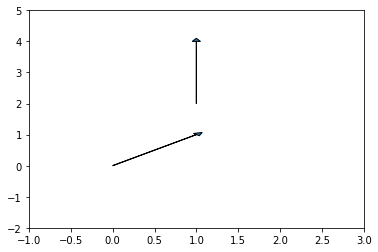

In [17]:
ax = plt.axes()
ax.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1)
ax.arrow(c[0], c[1], R_v[0][0], R_v[1][0], head_width=0.1, head_length=0.1)
plt.xlim([-1, 3])
plt.ylim([-2, 5])

회전축의 이동은 차지하고 scale=1 인데 벡터의 크기가 왜 변하는지 모르겠다. 수식이 문제인가. 좀더 확인 필요

---

[[  0.96592583   0.25881905 -57.58579834]
 [ -0.25881905   0.96592583  74.59243545]]


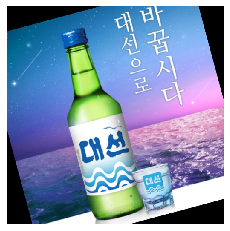

In [20]:
height, width, channel = img.shape

R = cv2.getRotationMatrix2D((width/2,height/2), 15, 1)
print(R)

R_img = cv2.warpAffine(img, R, (width,height))


b, g, r = cv2.split(R_img)
newimage = cv2.merge([r,g,b])

plt.figure()
plt.imshow(newimage)
plt.axis('off')
plt.show()

`cv2.getRotationMatrix2D()` 함수의 매개변수는 이미지의 센터와 각도와 scale이다.

---

# 저장

In [21]:
cv2.imwrite('result.png', R_img)

True

`cv2.imwrite(fileName, image)`
- fileName : 이미지 파일의 경로
- image : matplotlib으로 확인하기 위한 newimage가 아닌 변환한 R_img임을 주의해야 한다. 
    + newimage는 RGB가 바뀐 상태이다.

---

# 원근 보정

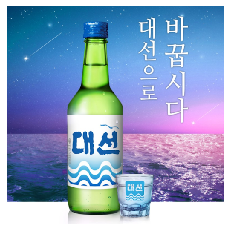

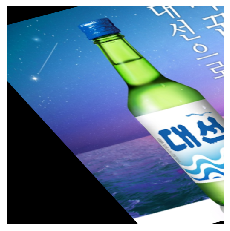

In [22]:
height, width, channeal = img.shape

perspective1 = np.float32([[50,50],[200,50],[20,200]])
perspective2 = np.float32([[10,100],[200,50],[100,250]])

p = cv2.getAffineTransform(perspective1, perspective2)

p_img = cv2.warpAffine(img, p, (width, height))


b, g, r = cv2.split(img)
newimage = cv2.merge([r,g,b])

plt.figure()
plt.imshow(newimage)
plt.axis('off')
plt.show()


b, g, r = cv2.split(p_img)
newimage = cv2.merge([r,g,b])

plt.figure()
plt.imshow(newimage)
plt.axis('off')
plt.show()

`cv2.getAffineTransform()`

좌표 (50,50), (200,50), (20,200)을 각각 (10,100), (200,50), (100,250)로 보낼때, 변환 행렬을 자동으로 출력해 주는 함수이다.

다른 방법도 있다.

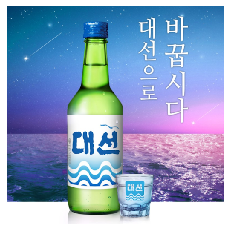

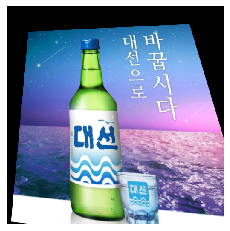

In [23]:
height, width, channeal = img.shape

perspective1 = np.float32([[0,0],[300,0],[0,300],[300,300]])
perspective2 = np.float32([[50,60],[260,50],[30,280],[290,290]])

p = cv2.getPerspectiveTransform(perspective1, perspective2)

p_img = cv2.warpPerspective(img, p, (width, height))


b, g, r = cv2.split(img)
newimage = cv2.merge([r,g,b])

plt.figure()
plt.imshow(newimage)
plt.axis('off')
plt.show()


b, g, r = cv2.split(p_img)
newimage = cv2.merge([r,g,b])

plt.figure()
plt.imshow(newimage)
plt.axis('off')
plt.show()

`cv2.getPerspectiveTransform()`

마찬가지로 변환 행렬을 자동으로 만들어준다. 다만, 4개의 좌표가 필요하다. 이미지의 4개의 점을 생각하는 것에서 보다 직관적으로 원근감을 줄 수 있다.

`cv2.warpAffine()`가 아닌 `cv2.warpPerspective()` 를 사용한다는 것에 주의가 필요

---

# Example

(1280, 960, 3)


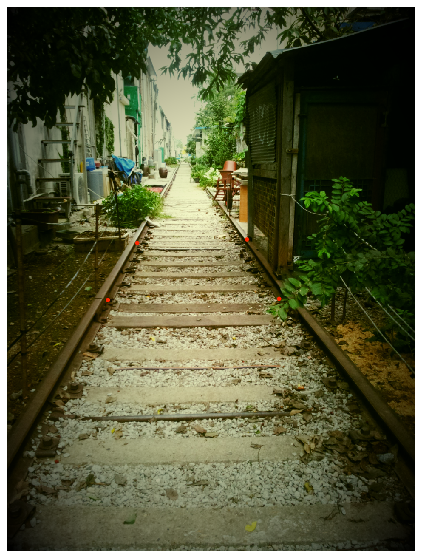

In [24]:
track = cv2.imread('track.png', cv2.IMREAD_COLOR)
print(track.shape)


b, g, r = cv2.split(track)
newimage = cv2.merge([r,g,b])

plt.figure(figsize=(10,10))
plt.imshow(newimage)
plt.axis('off')
plt.show()

In [25]:
track_cut = track.copy()
track_cut = track[540:700, 230:650]
track_cut.shape

(160, 420, 3)

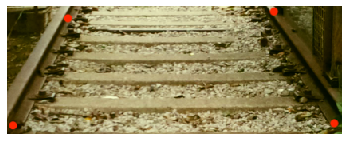

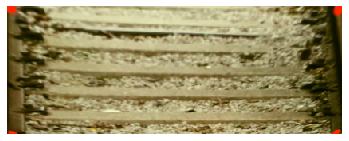

In [26]:
height, width, channeal = track_cut.shape

perspective1 = np.float32([[75,15],[335,5],[0,150],[420,150]])
perspective2 = np.float32([[0,0],[width,0],[0,height],[width,height]])

p = cv2.getPerspectiveTransform(perspective1, perspective2)

p_track = cv2.warpPerspective(track_cut, p, (width, height))


b, g, r = cv2.split(track_cut)
newimage = cv2.merge([r,g,b])

plt.figure()
plt.imshow(newimage)
plt.axis('off')
plt.show()


b, g, r = cv2.split(p_track)
newimage = cv2.merge([r,g,b])

plt.figure()
plt.imshow(newimage)
plt.axis('off')
plt.show()

In [27]:
p_track_re = cv2.resize(p_track, None, fx=3, fy=3, interpolation=cv2.INTER_LINEAR)

In [28]:
cv2.imwrite('track_copy.png', p_track_re)

True